# read data and check for missing

In [17]:
from pandas.errors import InvalidIndexError
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

In [11]:
data = pd.read_csv('/content/Restaurant_Reviews.tsv', sep='\t',quoting=3)
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# inspect data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
missing = data.isnull().sum()
missing

Review    0
Liked     0
dtype: int64

# Exploring data

In [14]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

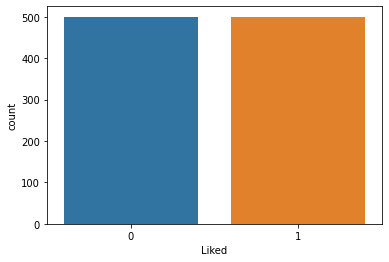

In [18]:
sns.countplot(x=data['Liked'])

In [16]:
# data['Review'].value_counts()

In [22]:
data['Review'].apply(len)
# data['Review'].apply(len).max()


0       24
1       18
2       41
3       87
4       59
      ... 
995     66
996     24
997     50
998     91
999    134
Name: Review, Length: 1000, dtype: int64

In [23]:
data['Review Lettre Count'] = data['Review'].apply(len)
data

,Review,Liked,Review Lettre Count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [25]:
data.iloc[data['Review Lettre Count'].idxmax()][0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

# pre-processing data (NLTK Text Data Cleaning)

In [40]:
# data['Review'][0]

In [29]:
# import string
# string.punctuation

In [32]:
import nltk

In [30]:
from nltk.corpus import stopwords

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [93]:
s = data['Review'][0]
s

'Wow... Loved this place.'

In [94]:
import re
s=re.sub('[^a-zA-Z0-9]', " ", s)
s

'Wow    Loved this place '

In [95]:
s = s.lower()
s

'wow    loved this place '

In [96]:
s = s.split()
s

['wow', 'loved', 'this', 'place']

In [99]:
temp = []

for word in s:
  if word not in stopwords.words('english'):
    temp.append(word)

temp

['wow', 'loved', 'place']

In [100]:
# [word for word in s if word not in stopwords.words('english')]

In [81]:
s = ' '.join(temp)
s

'wow loved place'

In [82]:
from nltk.stem import PorterStemmer

In [83]:
ps = PorterStemmer()
s = ps.stem(s)
s

'wow loved plac'

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
cv = CountVectorizer()
cv.fit_transform(s.split()).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

# putting it all together

In [109]:
corpus = []

for i in range (len(data)):
  s = re.sub('^[a-zA-Z]','',data['Review'][i])
  s = s.lower()
  s = s.split()
  s = [word for word in s if word not in stopwords.words('english')]
  s = ' '.join(s)
  s = ps.stem(s)
  corpus.append(s)


corpus

['ow... loved place.',
 'rust good.',
 'ot tasty texture nasty.',
 'topped late may bank holiday rick steve recommendation loved it.',
 'selection menu great prices.',
 'ow getting angry want damn pho.',
 'oneslty taste fresh.)',
 'potatoes like rubber could tell made ahead time kept warmer.',
 'fries great too.',
 'great touch.',
 'ervice prompt.',
 'ould go back.',
 'cashier care ever say still ended wayyy overpriced.',
 'tried cape cod ravoli, chicken, cranberry...mmmm!',
 'disgusted pretty sure human hair.',
 'shocked signs indicate cash only.',
 'ighly recommended.',
 'aitress little slow service.',
 'place worth time, let alone vegas.',
 'id like all.',
 'burrittos blah!',
 'food, amazing.',
 'ervice also cute.',
 'could care less... interior beautiful.',
 'performed.',
 "hat's right....the red velvet cake.....ohhh stuff good.",
 '- never brought salad asked for.',
 'hole wall great mexican street tacos, friendly staff.',
 'ook hour get food 4 tables restaurant food luke warm, se

In [114]:
cv = CountVectorizer()
cv.fit_transform(corpus).toarray().shape

(1000, 2105)

# model training and testing 

In [117]:
x = cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [118]:
y = data['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
train_test_split


In [123]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [126]:
X_train.shape

(670, 2105)

In [127]:
X_test.shape

(330, 2105)

# model building

In [128]:
from sklearn.naive_bayes import MultinomialNB

In [129]:
clf = MultinomialNB()

In [132]:
clf.fit(X_train,y_train)

MultinomialNB()

# model prediction

In [135]:
y_pred= clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,

In [137]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

# model evaluation

In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [139]:
print(confusion_matrix(y_test,y_pred))

[[127  46]
 [ 39 118]]


In [140]:
print(accuracy_score(y_test,y_pred))

0.7424242424242424


In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       173
           1       0.72      0.75      0.74       157

    accuracy                           0.74       330
   macro avg       0.74      0.74      0.74       330
weighted avg       0.74      0.74      0.74       330

